#### COMPANION WORKBOOK

# Classification Algorithms

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Binary Classification

#### First, let's import the libraries that we'll need (again, we purposely left this blank to allow you to practice this for yourself).
* If you forget a library, you can always add it later and re-run this code cell.

In [1]:
# NumPy and Pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)


# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline


# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
raw_df = pd.read_csv('./project_files/employee_data.csv')

print( raw_df.status.unique() )

raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [3]:
abt_df = pd.read_csv('./project_files/analytical_base_table.csv')

print( abt_df.status.unique() )

abt_df.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

## II. Simulation: Noisy Conditional

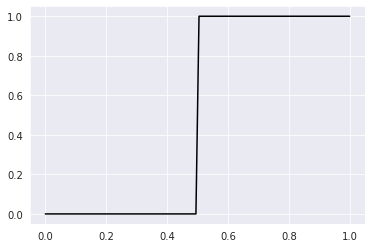

In [4]:
# Input feature 
x = np.linspace(0, 1, 100)

# Plot the conditional function
plt.plot(x, x > 0.5, color = 'k')
plt.show()

In [5]:
# Input feature
x = np.linspace(0, 1, 100)

# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2, 0.2, 100)

# Target variable
y = ((x + noise) > 0.5).astype(int)

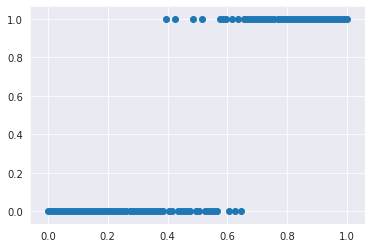

In [11]:
# Plot the noisy conditional dataset
plt.scatter(x, y)
plt.show()

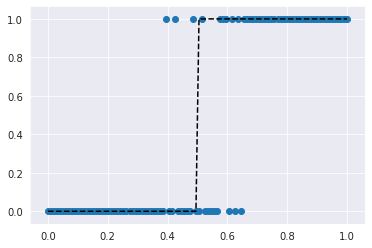

In [7]:
# Plot the noisy conditional dataset
plt.scatter(x, y)

# Plot the conditional function (signal)
plt.plot(x, x > 0.5, 'k--')

plt.show()

## III. Logistic Regression

In [8]:
# Import LinearRegression and Logisticregression
from sklearn.linear_model import LinearRegression, LogisticRegression

In [9]:
x.shape

(100,)

In [10]:
# Reshape x into X
X = x.reshape(100,1)

In [11]:
# X with 2 axes
print( X[:5] )

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]]


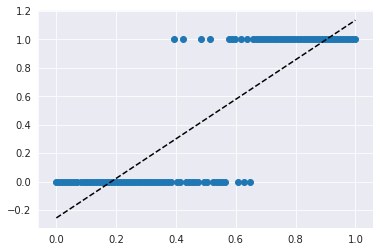

In [12]:
# Linear model 
model = LinearRegression()
model.fit(X,y)

# Plot datset and predrictions
plt.scatter(X,y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [13]:
# Logistic regression
model = LogisticRegression()
model.fit(X,y)

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# predict()
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# predict_proba()
pred = model.predict_proba(X[:10])
pred

array([[0.89323552, 0.10676448],
       [0.88947376, 0.11052624],
       [0.88559644, 0.11440356],
       [0.88160121, 0.11839879],
       [0.87748575, 0.12251425],
       [0.87324782, 0.12675218],
       [0.86888519, 0.13111481],
       [0.86439572, 0.13560428],
       [0.85977734, 0.14022266],
       [0.85502804, 0.14497196]])

In [16]:
# Class probabilities for first observation
pred[0]

array([0.89323552, 0.10676448])

In [17]:
# Positive class probability for first observation
pred[0][1]

0.10676448264067616

In [18]:
# Just get the second value for each prediction (the positive class)

pred = [p[1] for p in pred]
pred

[0.10676448264067616,
 0.11052623680433009,
 0.11440355742582131,
 0.11839879099901454,
 0.12251424555610417,
 0.12675218324295862,
 0.13111481252809298,
 0.1356042800526066,
 0.14022266213141374,
 0.14497195591931394]

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


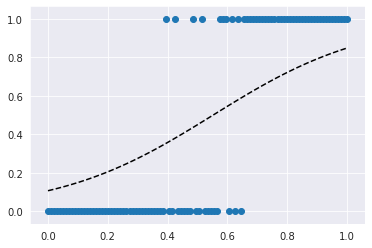

In [19]:
# Logistic regression
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
pred = model.predict_proba(X)

# Just get the second value (positive class) for each prediction
pred = [p[1] for p in pred]

# Plot dataset and predictions
plt.scatter(X,y)
plt.plot(X, pred, 'k--')
plt.show()

## IV. The Return of Model Complexity

In [20]:
def fit_and_plot_classifier(clf):
    # Fit model 
    clf.fit(X,y)
    
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    # Plot
    plt.scatter(X, y)
    plt.plot(X, pred,  'k--')
    plt.show()
    
    # Return fitted model and predictions
    return clf, pred

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


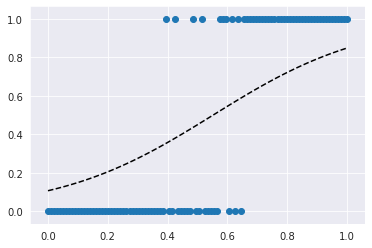

In [21]:
# Logistic regression
clf, pred = fit_and_plot_classifier(LogisticRegression())

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


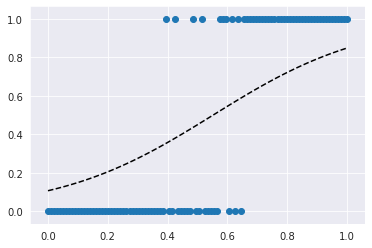

In [22]:
# Standard strenght
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1))

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


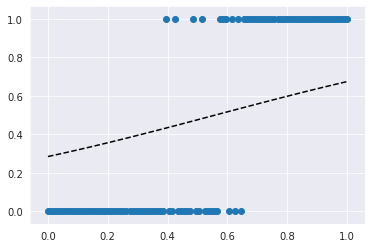

In [23]:
# More regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.25))

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


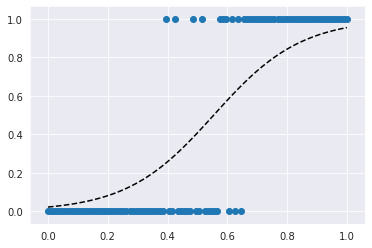

In [24]:
# Less Regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


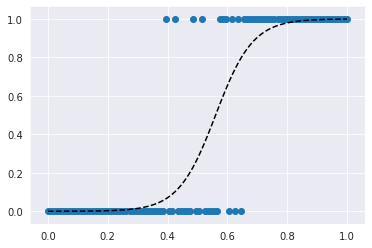

In [25]:
# Basically no regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=10000))

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 3.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've successfully generated the simulated noisy conditional dataset. Plot its scatterplot.

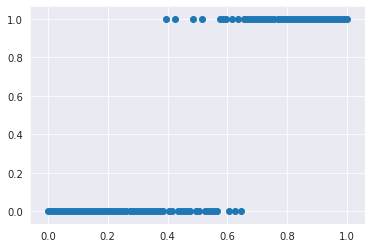

In [27]:
plt.scatter(X,y)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="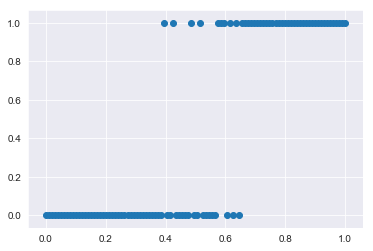&#10;">

#### B.) Next, confirm that you've reshaped in the input feature $x$ to have 2 "dimensions." Display the shape of <code>X</code>.

In [29]:
X.shape

(100, 1)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(100, 1)
</pre>

#### C.) Finally, confirm that you've correctly written a helper function to help you fit and plot classifiers. Fit and plot an L1-regularized logistic regression on the noisy conditional dataset with $C = 0.5$.
* What do you expect to see?

/workspace/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


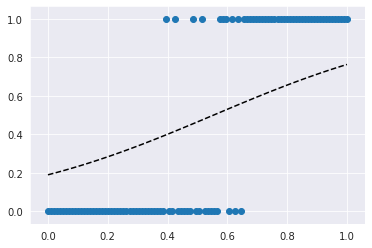

In [32]:
fit_and_plot_classifier(LogisticRegression(C=0.5) )
plt.show()

## <span style="color:RoyalBlue">Exercise 3.2 - Random Forest Classifiers</span>

In the Coding Section, we took a close look at regularized logistic regression, and we looked at how varying the model complexity affects the model. Now, let's do the same thing for our first tree ensemble, the random forest.

Just to recap, random forests train a large number of "strong" decision trees and combine their predictions through bagging. In addition, there are two sources of "randomness" for random forests:
1. Each decision tree is only allowed to choose from a random subset of features to split on.
2. Each decision tree is only trained on a random subset of observations (a process called **resampling**).

#### A.) First, import the <code style="color:steelblue">RandomForestClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [33]:
from sklearn.ensemble import RandomForestClassifier

Now, we've alluded to "default" hyperparameter settings for various algorithms, but you can actually very easily see what they are for yourself.

#### B.) Simply display an *instance* of <code>RandomForestClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the random forest classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

In [36]:
model = RandomForestClassifier()
model 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
</pre>

#### C.) Fit and plot a random forest with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

/workspace/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


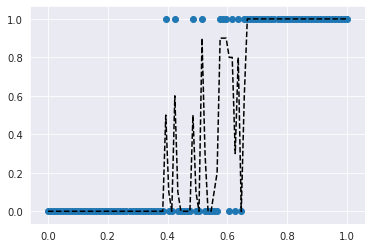

In [38]:
fit_and_plot_classifier(RandomForestClassifier(random_state=123))
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="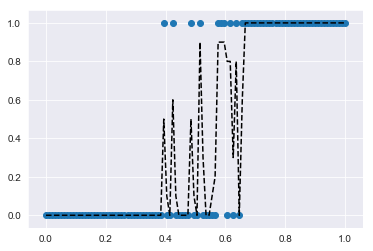&#10;">

For this simulated dataset, it's plain to see that the default random forest **suffers from overfitting**. That's not surprising because the dataset is incredibly simple, and decision trees may be too complex.

However, it's worth trying to tune the hyperparameters and overall model complexity to see if we can arrive at a better random forest.

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot random forests with 20, 50, 100, and 200 trees.
* For this dataset, does increasing the number of trees in the random forest help the model?

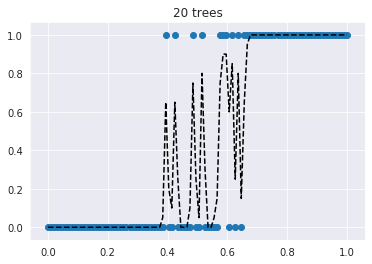

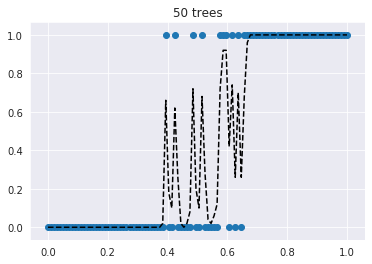

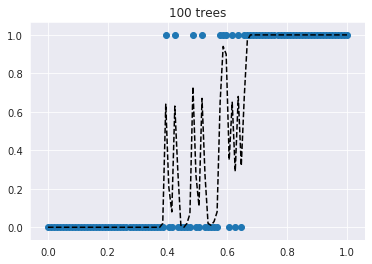

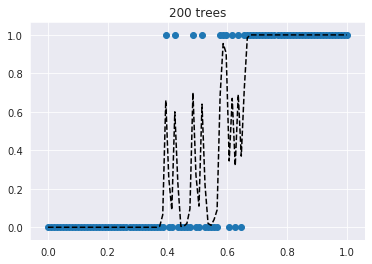

In [44]:
tree_volumes = [20, 50, 100, 200]

for tree_volume in tree_volumes:
    plt.title(f'{tree_volume} trees')
    fit_and_plot_classifier(RandomForestClassifier(n_estimators = tree_volume, random_state= 123))
    plt.show()


#### E.) Next, fit and plot random forests that set a higher minimum leaf size. Try minimum leaf sizes of 2, 5, 10, and 20.
* Does increasing the minimum leaf size improve the model?
* What can you conclude?

/workspace/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


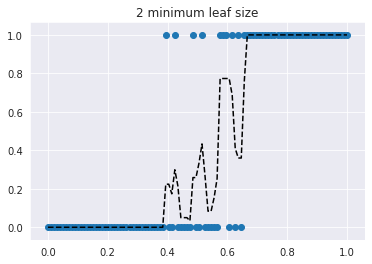

/workspace/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


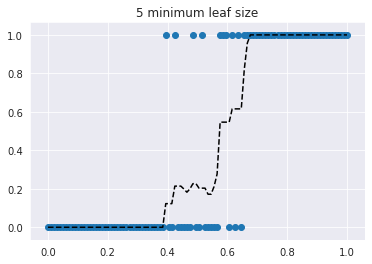

/workspace/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


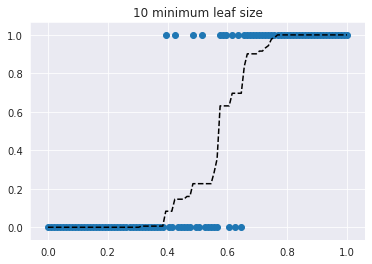

/workspace/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


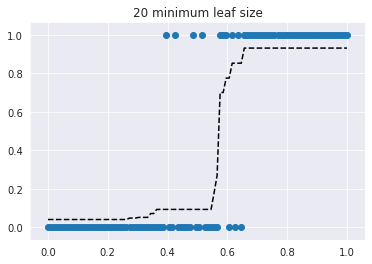

In [47]:
min_leafs = [2, 5, 10, 20]

for min_leaf in min_leafs:
    plt.title(f'{min_leaf} minimum leaf size')
    fit_and_plot_classifier(RandomForestClassifier(min_samples_leaf= min_leaf, random_state=123))
    plt.show()
    

## <span style="color:RoyalBlue">Exercise 3.3 - Gradient Boosted Classifiers</span>

Next, let's repeat the same exercise for gradient boosted trees and see if tuning the hyperparameters the same way has the same effects.

Just to recap, boosted trees train a sequence of "weak", **constrained** decision trees and combine their predictions through boosting. 
* Each decision tree is allowed a **maximum depth**, which should be tuned.
* Each decision tree in the sequence tries to correct the prediction errors of the one before it.

#### A.) First, import the <code style="color:steelblue">GradientBoostingClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

#### B.) Next, display an *instance* of <code>GradientBoostingClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the gradient boosted classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

In [49]:
model = GradientBoostingClassifier()
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
</pre>

#### C.) Fit and plot a gradient boosted tree with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

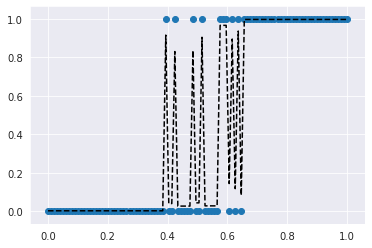

NameError: name 'plt_show' is not defined

In [52]:
fit_and_plot_classifier(GradientBoostingClassifier(random_state=123))
plt_show()

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="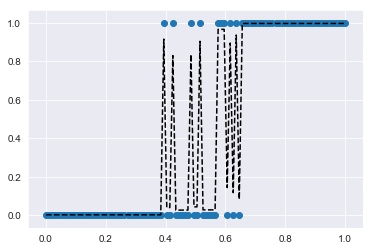&#10;">

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot boosted classifiers with 10, 20, 50, and 200 trees.
* For this dataset, does decreasing or increasing the number of trees in the classifier help the model?

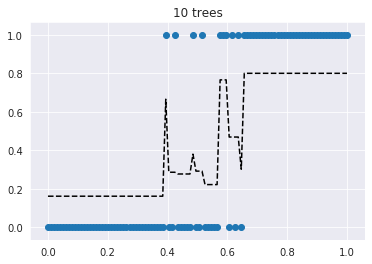

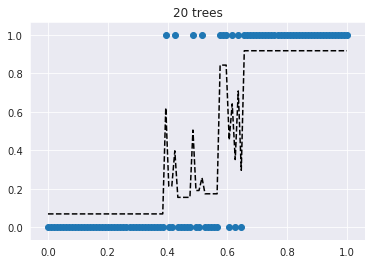

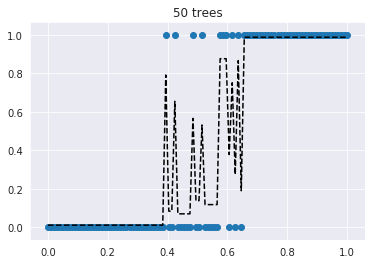

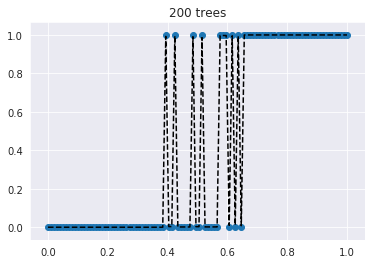

In [53]:
ntrees = [10, 20, 50, 200]

for ntree in ntrees:
    plt.title(f'{ntree} trees')
    fit_and_plot_classifier(GradientBoostingClassifier(n_estimators = ntree, random_state=123 ))
    plt.show()

#### E.) Next, fit and plot boosted trees with different max depth values. Try max depth values of 1, 2, 5, and 10.
* Does changing the max depth improve the model?
* What can you conclude?

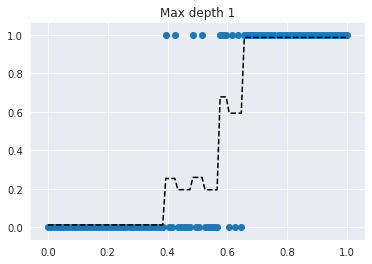

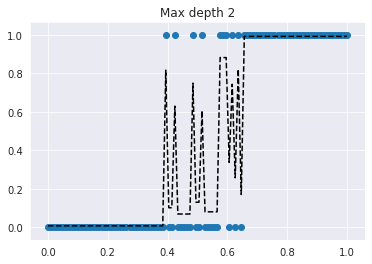

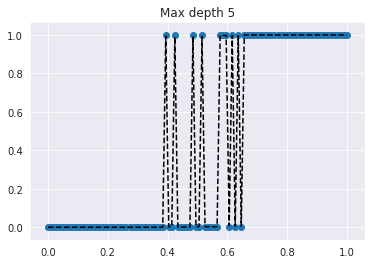

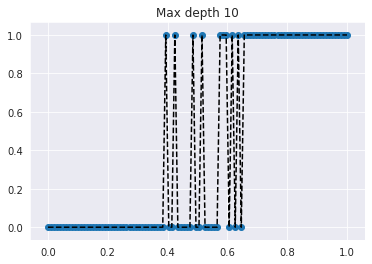

In [55]:
max_depths = [1, 2, 5, 10]

for max_depth in max_depths:
    plt.title(f'Max depth {max_depth}')
    fit_and_plot_classifier(GradientBoostingClassifier(max_depth = max_depth, random_state=123))
    plt.show()

Alright, that was a nice tour through some additional key theory and concepts, but let's get ready to dive back into the project! As a reminder, here are a few things you did in this module:
* You learned some key terminology for binary classification, such as "positive" vs. "negative" classes.
* You saw how logistic regression can also be regularized.
* You played around with different settings for penalty strength.
* And you recruited 4 algorithms: $L_1$-Regularized Logistic, $L_2$-Regularized Logistic, Random Forests, and Boosted Trees.

Now that we've recruited our 4 candidate algorithms, it's time to see which one performs the best! In the next module, we'll plug these algorithms into the powerful modeling process you learned in the previous project.